In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import itertools, sys

import catboost as cb

wids_path = ".."
sys.path.append(wids_path)

from global_vars import all_feature_columns, response_column
from utils.visualize import *

pd.set_option("display.max_columns", 500)
sns.set_context("talk")

<IPython.core.display.Javascript object>

In [3]:
feature_dict = {
    "compare_impute_log_temp_pca_onehot": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "compare_impute_log_temp_pca_onehot_impute": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {
            "energy_star_rating": ["state_factor", "building_class", "facility_type"]
        },
    },
    "compare_impute_log_temp_pca_onehot_xgb_impute": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    
}

<IPython.core.display.Javascript object>

In [19]:
def combine_rmse_results(config_name_list, depth_list=[12], seed_list=[0,9]):
    rmse_df = pd.DataFrame()
    for config_name in config_name_list:
        for seed, depth in itertools.product(seed_list, depth_list):
            #             print(seed, depth, config_name)
            try:
                _df = pd.read_csv(
                    f"{wids_path}/validation_result/hannah/{config_name}_depth{depth}_seed{seed}.csv"
                ).assign(config=config_name, depth=depth, seed=seed)
                rmse_df = pd.concat([rmse_df, _df], axis=0)
            except:
                print(f"{config_name}_depth{depth}_seed{seed}.csv not found")
        rmse_df = rmse_df.reset_index(drop=True)
    return rmse_df

<IPython.core.display.Javascript object>

In [20]:
rmse_df = combine_rmse_results(feature_dict.keys())

<IPython.core.display.Javascript object>

In [10]:
def plot_train_and_test_rmse(rmse_df, seed):
    fig, axes = plt.subplots(figsize=(11, 9), nrows=2)
    sns.boxplot(
        data=rmse_df.query("method == 'loyo' and seed == @seed").sort_values("config"),
        x="config",
        y="train_rmse",
        hue="depth",
        ax=axes[0],
    )
    add_median_labels(axes[0])
    sns.scatterplot(
        data=rmse_df.query("method == 'whole train' and seed == @seed").sort_values(
            "config"
        ),
        x="config",
        y="train_rmse",
        ax=axes[0],
        color="white",
        edgecolor="k",
        label="whole train",
        hue="depth",
    )
    _ = axes[0].set_xticklabels([])
    axes[0].legend(bbox_to_anchor=(1, 1))

    sns.boxplot(
        data=rmse_df.sort_values("config"),
        x="config",
        y="test_rmse",
        hue="depth",
        ax=axes[1],
    )
    _ = axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
    axes[1].legend(bbox_to_anchor=(1, 1))
    add_median_labels(axes[1])
    fig.subplots_adjust(hspace=0)
    fig.suptitle(f"Seed {seed}")

<IPython.core.display.Javascript object>

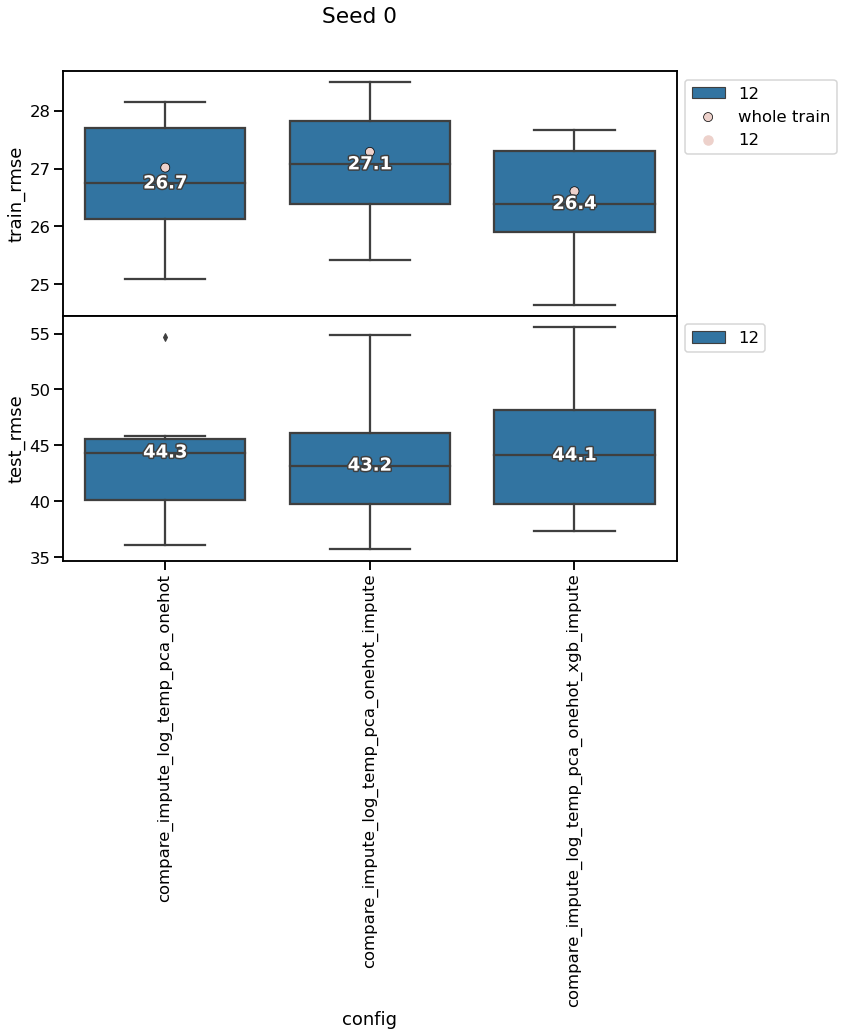

<IPython.core.display.Javascript object>

In [11]:
plot_train_and_test_rmse(rmse_df, 0)

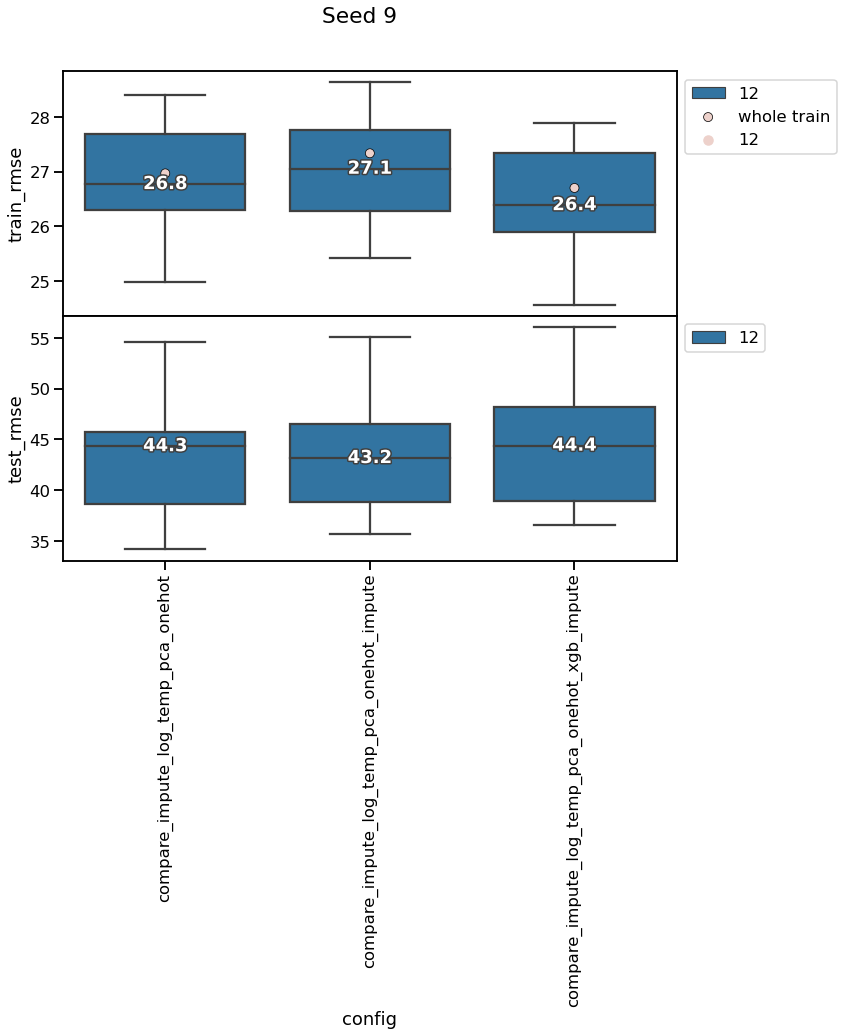

<IPython.core.display.Javascript object>

In [21]:
plot_train_and_test_rmse(rmse_df, 9)

In [13]:
rmse_df.query("method == 'whole train'").sort_values("depth")

,left_out_year,train_rmse,test_rmse,method,config,depth,seed
6,0.0,27.016555,NaN,whole train,compare_impute_log_temp_pca_onehot,12,0
13,0.0,27.287973,NaN,whole train,compare_impute_log_temp_pca_onehot_impute,12,0
20,0.0,26.607976,NaN,whole train,compare_impute_log_temp_pca_onehot_xgb_impute,12,0


<IPython.core.display.Javascript object>